In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import math

In [14]:
def calc_spectral_efficiency(tau_c, tau_p, M_k, p_d, eta_kl, eta_matrix, beta_matrix, L, U_j):
    """
    Calculate spectral efficiency for user k with realistic path loss and interference
    """
    
    # Calculate numerator with distance-dependent M_k
    effective_M_k = int(M_k * eta_kl)  # Reduce effective APs based on channel quality
    numerator = (effective_M_k*2) * p_d * (eta_kl*2)
    
    # Calculate denominator with realistic interference
    noise_power = 1e-14  # Thermal noise power (-110 dBm)
    denominator = noise_power
    n_users = len(eta_matrix)
    
    interference_sum = 0
    for j in range(L):
        for i in range(n_users):
            interference_sum += M_k * p_d * eta_matrix[i][j] * beta_matrix[i][j]
    
    # Add interference to denominator
    denominator += interference_sum
    
    # Calculate the complete expression
    SE = ((tau_c - tau_p) / tau_c) * math.log2(1 + (numerator / denominator))
    
    return SE

In [15]:
np.random.seed(42)

In [16]:
x_length = 100  # meters
y_length = 100  # meters
z_length = 20   # meters (typical indoor height)

# Number of APs and users
n_aps = 100
n_users = 20

# Generate AP positions
x_pos_aps = np.random.uniform(0, x_length, n_aps)
y_pos_aps = np.random.uniform(0, y_length, n_aps)
z_pos_aps = np.random.normal(z_length/2, z_length/4, n_aps)  # Most APs at middle height with some variation
z_pos_aps = np.clip(z_pos_aps, 0, z_length)

# Generate user positions
x_pos_users = np.random.uniform(0, x_length, n_users)
y_pos_users = np.random.uniform(0, y_length, n_users)
z_pos_users = np.random.normal(z_length/2, z_length/6, n_users)  # Users are typically at middle height with less variation
z_pos_users = np.clip(z_pos_users, 0, z_length)

# Combine positions into feature matrices
X_aps = np.column_stack((x_pos_aps, y_pos_aps, z_pos_aps))
X_users = np.column_stack((x_pos_users, y_pos_users, z_pos_users))


In [ ]:
# import numpy as np
# import math

# def calc_spectral_efficiency(tau_c, tau_p, M_k, p_d, eta_kl, eta_matrix, beta_matrix, L, U_j):
#     """
#     Calculate spectral efficiency for user k with realistic path loss and interference
#     """
#     # Calculate numerator with distance-dependent M_k
#     effective_M_k = int(M_k * eta_kl)  # Reduce effective APs based on channel quality
#     numerator = (effective_M_k**2) * p_d * (eta_kl**2)
    
#     # Calculate denominator with realistic interference
#     noise_power = 1e-14  # Thermal noise power (-110 dBm)
#     denominator = noise_power
#     n_users = len(eta_matrix)
    
#     interference_sum = 0
#     for j in range(L):
#         for i in range(n_users):
#             interference_sum += M_k * p_d * eta_matrix[i][j] * beta_matrix[i][j]
    
#     # Add interference to denominator
#     denominator += interference_sum
    
#     # Calculate the complete expression
#     SE = ((tau_c - tau_p) / tau_c) * math.log2(1 + (numerator / denominator))
    
#     return SE

# def compute_channel_parameters(X_aps, X_users, n_antennas_per_ap):
#     """
#     Compute large-scale fading (beta_mk) and channel quality (eta_kl) based on positions
#     """
#     n_aps = X_aps.shape[0]
#     n_users = X_users.shape[0]
    
#     # Initialize matrices
#     beta_matrix = np.zeros((n_users, n_aps))
#     eta_matrix = np.zeros((n_users, n_aps))
    
#     for k in range(n_users):
#         for m in range(n_aps):
#             # Calculate Euclidean distance in 3D (in meters)
#             distance = max(np.sqrt(np.sum((X_users[k] - X_aps[m])**2)), 1)  # Minimum 1m distance
            
#             # Large-scale fading (beta_mk) using 3GPP Urban Micro model
#             path_loss_dB = 30.6 + 36.7 * np.log10(distance)
#             beta_matrix[k, m] = 10**(-path_loss_dB / 10)
            
#             # Channel estimation quality (eta_kl)
#             eta_matrix[k, m] = 1 / (1 + 0.1 * distance)
    
#     return beta_matrix, eta_matrix

# def random_ap_assignment_with_se(X_aps, X_users, n_antennas_per_ap, tau_c=200, tau_p=10, p_d=0.1):
#     """
#     Randomly assign users to APs and calculate spectral efficiency for each user
    
#     Parameters:
#     X_aps (numpy.ndarray): AP positions (n_aps x 3)
#     X_users (numpy.ndarray): User positions (n_users x 3)
#     n_antennas_per_ap (int): Number of antennas per AP
#     tau_c (int): Coherence interval length (symbols)
#     tau_p (int): Pilot sequence length (symbols)
#     p_d (float): Downlink transmit power (Watts)
    
#     Returns:
#     tuple: (assignments, se_values)
#         - assignments: Array of AP indices for each user
#         - se_values: Array of spectral efficiencies for each user
#     """
#     n_aps = X_aps.shape[0]
#     n_users = X_users.shape[0]
    
#     # Compute channel parameters
#     beta_matrix, eta_matrix = compute_channel_parameters(X_aps, X_users, n_antennas_per_ap)
    
#     # Randomly assign each user to one AP
#     assignments = np.random.randint(0, n_aps, size=n_users)
    
#     # Calculate spectral efficiency for each user
#     se_values = np.zeros(n_users)
#     L = n_aps  # Number of APs (treated as clusters for compatibility)
#     U_j = n_users  # Total users (simplified, as random assignment doesn't cluster)
    
#     for k in range(n_users):
#         assigned_ap = assignments[k]
#         eta_kl = eta_matrix[k, assigned_ap]
#         M_k = n_antennas_per_ap  # Antennas for the assigned AP
#         se_values[k] = calc_spectral_efficiency(
#             tau_c, tau_p, M_k, p_d, eta_kl, eta_matrix, beta_matrix, L, U_j
#         )
    
#     return assignments, se_values

# # Example usage
# x_length = 100  # meters
# y_length = 100  # meters
# z_length = 20   # meters (typical indoor height)

# # Number of APs and users
# n_aps = 100
# n_users = 20
# n_antennas_per_ap = 5  # From paper's simulation parameters (Table I)

# # Generate AP positions
# np.random.seed(42)  # For reproducibility
# x_pos_aps = np.random.uniform(0, x_length, n_aps)
# y_pos_aps = np.random.uniform(0, y_length, n_aps)
# z_pos_aps = np.random.normal(z_length/2, z_length/4, n_aps)
# z_pos_aps = np.clip(z_pos_aps, 0, z_length)

# # Generate user positions
# x_pos_users = np.random.uniform(0, x_length, n_users)
# y_pos_users = np.random.uniform(0, y_length, n_users)
# z_pos_users = np.random.normal(z_length/2, z_length/6, n_users)
# z_pos_users = np.clip(z_pos_users, 0, z_length)

# # Combine positions into feature matrices
# X_aps = np.column_stack((x_pos_aps, y_pos_aps, z_pos_aps))
# X_users = np.column_stack((x_pos_users, y_pos_users, z_pos_users))

# # Run random assignment and SE calculation
# assignments, se_values = random_ap_assignment_with_se(X_aps, X_users, n_antennas_per_ap)

# # Print results
# print("User to AP assignments and Spectral Efficiency:")
# for user_idx, (ap_idx, se) in enumerate(zip(assignments, se_values)):
#     print(f"User {user_idx}: Assigned to AP {ap_idx}, SE = {se:.5f} bits/s/Hz")

In [17]:
# def random_ap_assignment(n_users, n_aps):
#     """
#     Randomly assigns each user to one Access Point (AP).
    
#     Parameters:
#     n_users (int): Number of users (UEs)
#     n_aps (int): Number of Access Points (APs)
    
#     Returns:
#     numpy.ndarray: Array of length n_users, where each element is the index of the assigned AP
#     """
#     # Randomly assign each user to one of the APs
#     assignments = np.random.randint(0, n_aps, size=n_users)
#     return assignments

# # Example usage with the provided setup
# # n_aps = 100
# # n_users = 20

# # Generate assignments
# assignments = random_ap_assignment(n_users, n_aps)

# # Print results
# print("User to AP assignments:")
# for user_idx, ap_idx in enumerate(assignments):
#     print(f"User {user_idx} assigned to AP {ap_idx}")

User to AP assignments:
User 0 assigned to AP 81
User 1 assigned to AP 95
User 2 assigned to AP 23
User 3 assigned to AP 22
User 4 assigned to AP 61
User 5 assigned to AP 95
User 6 assigned to AP 36
User 7 assigned to AP 11
User 8 assigned to AP 54
User 9 assigned to AP 12
User 10 assigned to AP 22
User 11 assigned to AP 88
User 12 assigned to AP 98
User 13 assigned to AP 29
User 14 assigned to AP 16
User 15 assigned to AP 61
User 16 assigned to AP 83
User 17 assigned to AP 88
User 18 assigned to AP 85
User 19 assigned to AP 12


cluster_labels_aps:  [4 3 1 1 2 0 0 3 4 4 0 1 3 2 2 2 2 4 2 2 3 2 0 4 4 1 2 3 4 0 1 0 0 1 3 1 2
 2 1 2 2 4 0 1 0 4 2 4 4 0 3 1 1 1 3 1 2 2 0 2 4 2 3 2 0 3 0 1 0 1 3 0 0 1
 3 1 3 0 2 0 1 4 2 2 0 2 3 3 1 4 0 3 3 3 1 4 3 2 2 2]
clusterAP:  [[5, 6, 10, 22, 29, 31, 32, 42, 44, 49, 58, 64, 66, 68, 71, 72, 77, 79, 84, 90], [2, 3, 11, 25, 30, 33, 35, 38, 43, 51, 52, 53, 55, 67, 69, 73, 75, 80, 88, 94], [4, 13, 14, 15, 16, 18, 19, 21, 26, 36, 37, 39, 40, 46, 56, 57, 59, 61, 63, 78, 82, 83, 85, 97, 98, 99], [1, 7, 12, 20, 27, 34, 50, 54, 62, 65, 70, 74, 76, 86, 87, 91, 92, 93, 96], [0, 8, 9, 17, 23, 24, 28, 41, 45, 47, 48, 60, 81, 89, 95]]


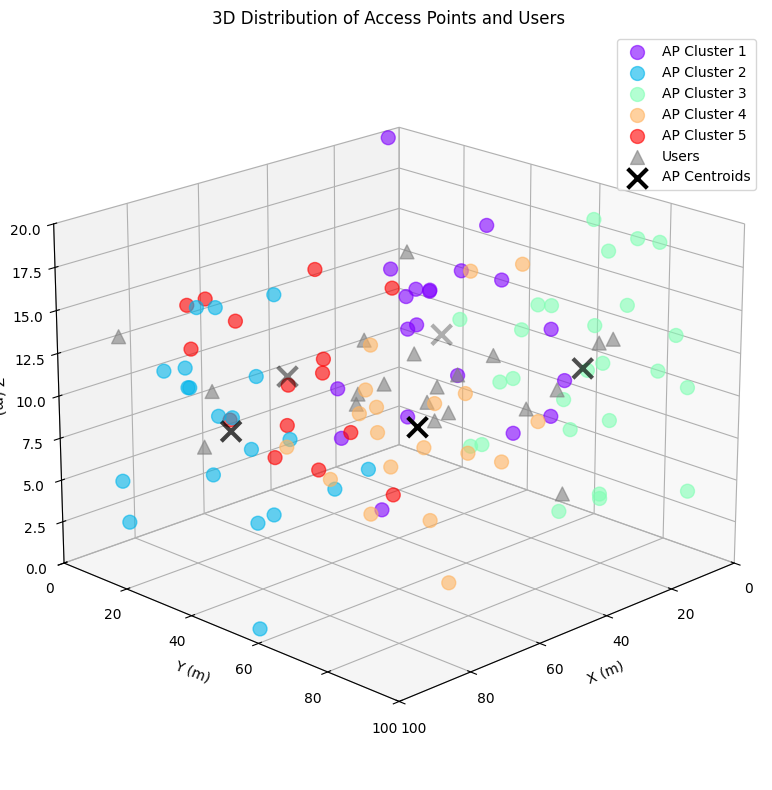

clusterX:  [1 3 3 4 4 2 2 3 2 0 0 2 1 3 2 2 4 2 0 2]
M:  [[2, 3, 11, 25, 30, 33, 35, 38, 43, 51, 52, 53, 55, 67, 69, 73, 75, 80, 88, 94], [1, 7, 12, 20, 27, 34, 50, 54, 62, 65, 70, 74, 76, 86, 87, 91, 92, 93, 96], [1, 7, 12, 20, 27, 34, 50, 54, 62, 65, 70, 74, 76, 86, 87, 91, 92, 93, 96], [0, 8, 9, 17, 23, 24, 28, 41, 45, 47, 48, 60, 81, 89, 95], [0, 8, 9, 17, 23, 24, 28, 41, 45, 47, 48, 60, 81, 89, 95], [4, 13, 14, 15, 16, 18, 19, 21, 26, 36, 37, 39, 40, 46, 56, 57, 59, 61, 63, 78, 82, 83, 85, 97, 98, 99], [4, 13, 14, 15, 16, 18, 19, 21, 26, 36, 37, 39, 40, 46, 56, 57, 59, 61, 63, 78, 82, 83, 85, 97, 98, 99], [1, 7, 12, 20, 27, 34, 50, 54, 62, 65, 70, 74, 76, 86, 87, 91, 92, 93, 96], [4, 13, 14, 15, 16, 18, 19, 21, 26, 36, 37, 39, 40, 46, 56, 57, 59, 61, 63, 78, 82, 83, 85, 97, 98, 99], [5, 6, 10, 22, 29, 31, 32, 42, 44, 49, 58, 64, 66, 68, 71, 72, 77, 79, 84, 90], [5, 6, 10, 22, 29, 31, 32, 42, 44, 49, 58, 64, 66, 68, 71, 72, 77, 79, 84, 90], [4, 13, 14, 15, 16, 18, 19, 21, 26, 36, 3

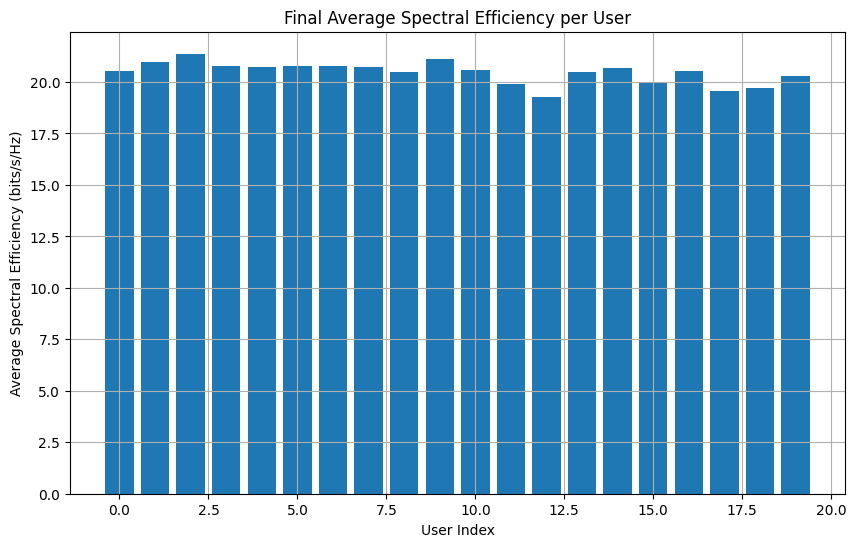

In [ ]:
# Perform K-means clustering for APs only
n_clusters = 5
kmeans_aps = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
cluster_labels_aps = kmeans_aps.fit_predict(X_aps)
print("cluster_labels_aps: ",cluster_labels_aps)

# Initialize clusterAP with n_clusters empty lists
clusterAP = [[] for _ in range(n_clusters)]

for i in range(n_aps):
    clusterAP[cluster_labels_aps[i]].append(i)

print("clusterAP: ",clusterAP)
# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot APs with different colors for each cluster
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    mask = cluster_labels_aps == i
    ax.scatter(x_pos_aps[mask], y_pos_aps[mask], z_pos_aps[mask], 
              c=[colors[i]], marker='o', s=100, alpha=0.6,
              label=f'AP Cluster {i+1}')

# Plot all users in a single color
ax.scatter(x_pos_users, y_pos_users, z_pos_users, 
          c='gray', marker='^', s=100, alpha=0.6,
          label='Users')

# Plot AP centroids
centroids_aps = kmeans_aps.cluster_centers_
ax.scatter(centroids_aps[:, 0], centroids_aps[:, 1], centroids_aps[:, 2],
          c='black', marker='x', s=200, linewidths=3,
          label='AP Centroids')

# Set labels and title
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Distribution of Access Points and Users')

# Set axis limits
ax.set_xlim(0, x_length)
ax.set_ylim(0, y_length)
ax.set_zlim(0, z_length)

# Add grid
ax.grid(True)

# Adjust viewing angle for better visualization
ax.view_init(elev=20, azim=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

for i in range(n_clusters):
    cluster_size = np.sum(cluster_labels_aps == i)

distances = np.zeros((n_users, n_clusters))

# Calculate distances between each user and each cluster centroid
for i in range(n_users):
    for j in range(n_clusters):
        # Calculate Euclidean distance in 3D space
        distances[i, j] = np.sqrt(np.sum((X_users[i] - centroids_aps[j])**2))

sorted_distances = np.zeros_like(distances)
sorted_indices = np.zeros_like(distances, dtype=int)
clusterX=np.zeros(n_users,dtype=int)
for i in range(n_users):
    clusterX[i] = np.argsort(distances[i])[0]


print("clusterX: ",clusterX)

M = [[] for _ in range(n_users)]
for i in range(n_users):
    M[i]=clusterAP[clusterX[i]]

print("M: ",M)


# System parameters
tau_c = 200  # coherence time
tau_p = 10   # pilot sequence length
p_d = 0.1    # downlink transmit power (W) = 100mW

# Initialize matrices for channel estimation and large-scale fading
eta_matrix = np.zeros((n_users, n_clusters))
beta_matrix = np.zeros((n_users, n_clusters))

# Calculate channel estimation quality (eta) and large-scale fading (beta) based on distances
for i in range(n_users):
    for j in range(n_clusters):
        d = max(distances[i][j], 1)  # minimum 1m distance
        # Realistic path loss model (3GPP Urban Micro)
        path_loss_dB = 30.6 + 36.7 * np.log10(d)
        beta_matrix[i][j] = 10**(-path_loss_dB/10)
        
        # Channel estimation quality degrading with distance
        eta_matrix[i][j] = 1 / (1 + 0.1 * d)  # Degrades with distance

        
        # Channel estimation quality degrading with distance
        # eta_matrix[i][j] = 1 / (1 + 0.1 * d)  # Degrades with distance

# Step 4 of CAPS: Calculate SE for each AP in Mi for each user
user_ap_se = {}  # Dictionary to store SE values for each user's APs
user_assigned_aps = {i: [] for i in range(n_users)}  # Track assigned APs for each user

iteration = 1
# Iterate until all users have at least one AP assigned
while any(len(user_assigned_aps[i]) == 0 for i in range(n_users)):
    print(f"\nIteration {iteration} - Least SE Values:")
    print("===============================")
    
    for i in range(n_users):
        if len(user_assigned_aps[i]) > 0:  # Skip users who already have an AP
            continue
            
        user_ap_se[i] = {}
        cluster_idx = clusterX[i]
        
        # For each AP in the user's assigned cluster (Mi)
        available_aps = [ap for ap in M[i] if not any(ap in assigned_aps for assigned_aps in user_assigned_aps.values())]
        
        if not available_aps:  # If no APs available in preferred cluster, look in other clusters
            for other_cluster in range(n_clusters):
                if other_cluster != cluster_idx:
                    available_aps.extend([ap for ap in clusterAP[other_cluster] 
                                       if not any(ap in assigned_aps for assigned_aps in user_assigned_aps.values())])
        
        for ap_idx in available_aps:
            # Calculate distance from user to this specific AP
            ap_pos = X_aps[ap_idx]
            user_pos = X_users[i]
            d = max(np.sqrt(np.sum((ap_pos - user_pos)**2)), 1)
            
            # Calculate path loss and channel quality
            path_loss_dB = 30.6 + 36.7 * np.log10(d)
            beta = 10**(-path_loss_dB/10)
            eta = 1 / (1 + 0.1 * d)
            
            # Calculate SE
            se = calc_spectral_efficiency(
                tau_c=tau_c,
                tau_p=tau_p,
                M_k=20,
                p_d=p_d,
                eta_kl=eta,
                eta_matrix=eta_matrix,
                beta_matrix=beta_matrix,
                L=n_clusters,
                U_j=clusterAP
            )
            user_ap_se[i][ap_idx] = se
        
        if user_ap_se[i]:  # If we found any available APs
            # Sort and assign the best available AP to this user
            best_ap = max(user_ap_se[i].items(), key=lambda x: x[1])[0]
            user_assigned_aps[i].append(best_ap)
    
    # Print least SE values for all users after this iteration
    for user_idx in range(n_users):
        if user_idx in user_ap_se and user_ap_se[user_idx]:
            min_se = min(user_ap_se[user_idx].values())
            print(f"User {user_idx}: {min_se:.4f} bits/s/Hz")
        else:
            print(f"User {user_idx}: No SE values calculated yet")
    
    iteration += 1

# Print final assignment results
print("\nFinal AP Assignments and Spectral Efficiency Results:")
print("====================================================")
for user_idx in range(n_users):
    print(f"\nUser {user_idx}:")
    print(f"Assigned AP(s): {user_assigned_aps[user_idx]}")
    if user_idx in user_ap_se:
        assigned_se = [user_ap_se[user_idx][ap] for ap in user_assigned_aps[user_idx]]
        print(f"Spectral Efficiency: {[f'{se:.4f}' for se in assigned_se]} bits/s/Hz")
        # print(f"Average SE: {np.mean(assigned_se):.4f} bits/s/Hz")
    print("--------------------------------------------")

# Calculate and plot final average spectral efficiencies
final_user_averages = []
for user_idx in range(n_users):
    if user_idx in user_ap_se:
        assigned_se = [user_ap_se[user_idx][ap] for ap in user_assigned_aps[user_idx]]
        final_user_averages.append(np.mean(assigned_se))
    else:
        final_user_averages.append(0)

plt.figure(figsize=(10, 6))
plt.bar(range(len(final_user_averages)), final_user_averages)
plt.xlabel('User Index')
plt.ylabel('Average Spectral Efficiency (bits/s/Hz)')
plt.title('Final Average Spectral Efficiency per User')
plt.grid(True)
plt.show()